In [ ]:
#freeview -f $SUBJECTS_DIR/fsaverage/surf/lh.inflated:annot=aparc.annot:annot_outline=1:overlay=lh.patient_control.glmdir/group.diff/sig.mgh:overlay_threshold=3,5 -viewport 3d -layout 1

In [521]:
def add_group(df,df2):
    for row in range(0, len(scan_info.index)):
                # index values of every row with inclusion criteria (obain task name and run #)
                if element in scan_info.iloc[row,1]:
                    print('Currently unpacking functional runs for '+element)
                    if userinput == 1:
                        scan_name_index.append(scan_info.iloc[row,1])
                        scan_num_index.append(scan_info.iloc[row,0])
                    else:
                        #exit the whole loop
                        # ask for confirmation of task contents (these are all the runs)
                        instring = 'Would you like to include run '+str(scan_info.iloc[row,1])+' for task '+str(element)+' ?'
                        userinput = verifyrun(instring)


In [522]:
def parserow(rows,cols,rois):
    lastrowL = (rows*cols)
    lastrowF = (rows*cols)-(cols)
    return [rois[i] for i in range(lastrowF, lastrowL)]

In [523]:
def makenames(rois):
    trunc_aseg = list(rois)
    trunc_aseg[2] = 'L-Cerebellum-WM'
    trunc_aseg[3] = 'L-Cerebellum-Ctx'
    trunc_aseg[18] = 'R-Lat-Ventricle'
    trunc_aseg[20] = 'R-Cerebellum-WM'
    trunc_aseg[21] = 'R-Cerebellum-Ctx'
    trunc_aseg[33] = 'WM-hypo-I'
    trunc_aseg[34] = 'L-WM-hypo-I'
    trunc_aseg[35] = 'R-WM-hypo-I'
    trunc_aseg[36] = 'Non-WM-hypo-I'
    trunc_aseg[37] = 'L-Non-WM-hypo-I'
    trunc_aseg[38] = 'R-Non-WM-hypo-I'
    trunc_aseg[46] = 'SegVNotVent'
    trunc_aseg[47] = 'SegVNotVentSurf'
    trunc_aseg[51] = 'lhCerebralWMVol'
    trunc_aseg[52] = 'rhCerebralWMVol'
    trunc_aseg[53] = 'CerebralWMVol'
    trunc_aseg[56] = 'SupraTentVol'
    trunc_aseg[57] = 'SupraTentVNotVent'
    trunc_aseg[58] = 'SupraTentVNotVentVox'
    trunc_aseg[65] = 'eTotalICV'
    return trunc_aseg

aseg
66
lh
37
there is no graph eTIV to print for this block 37
rh
37
there is no graph eTIV to print for this block 37


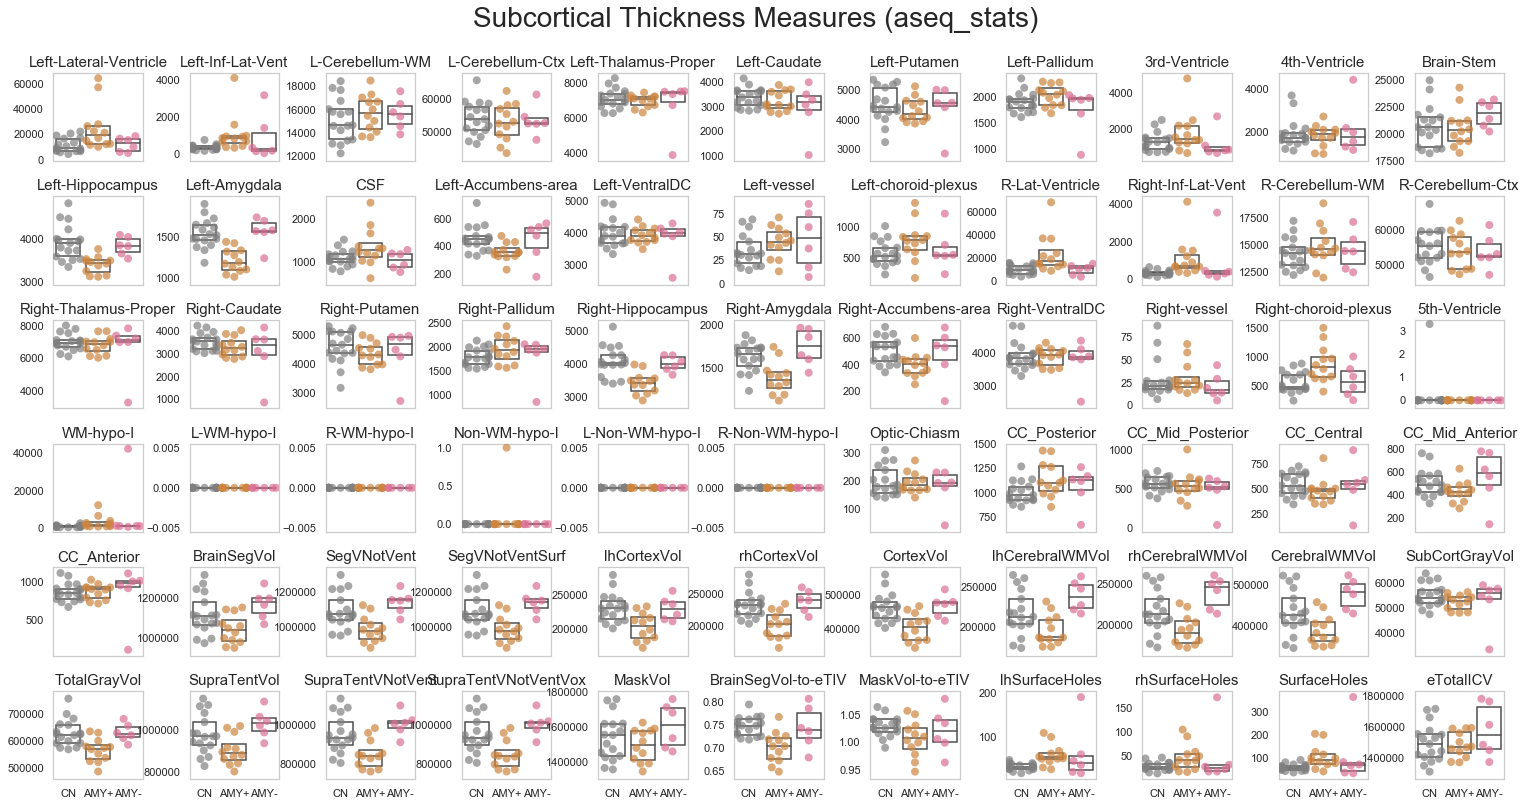

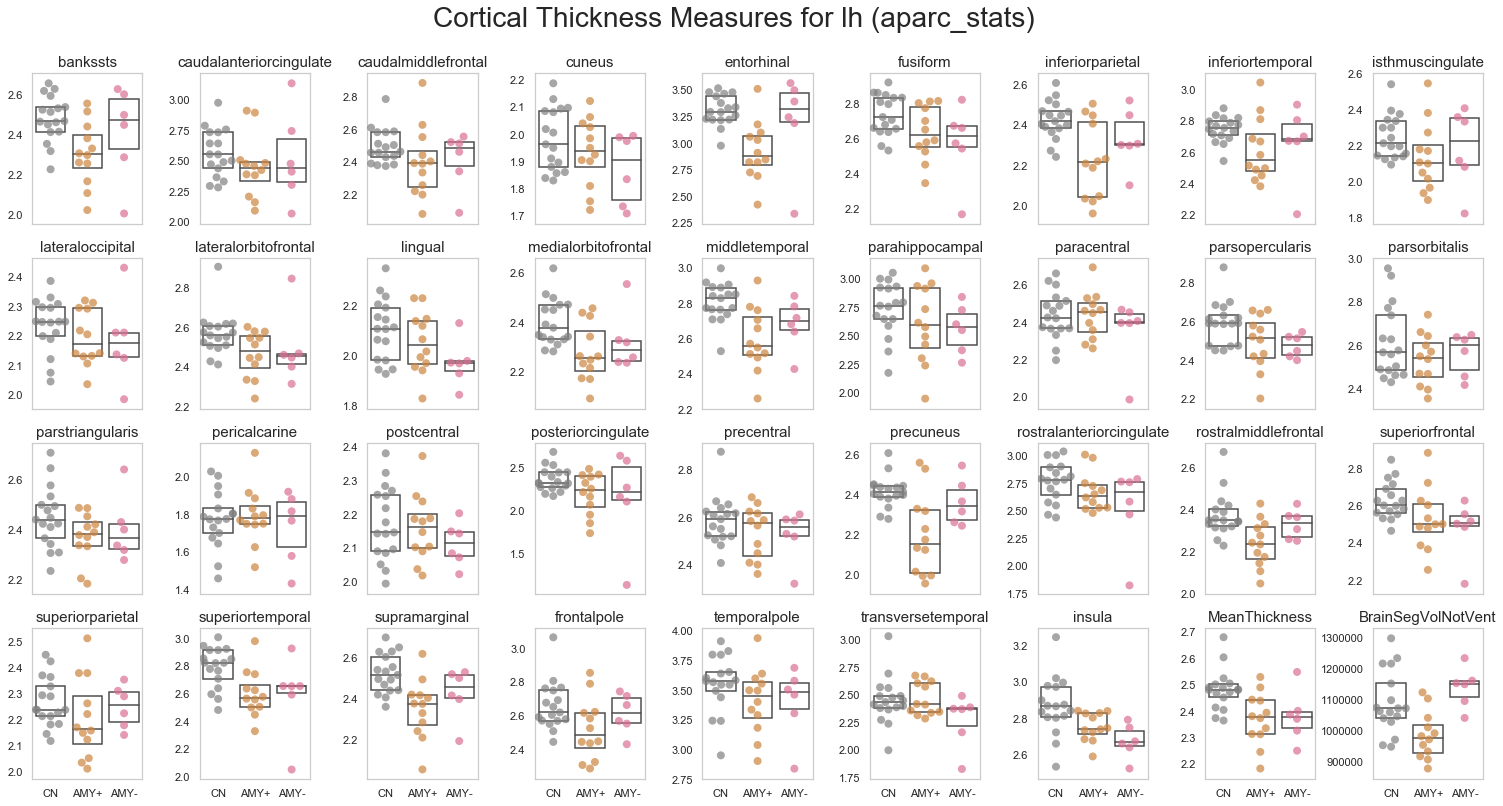

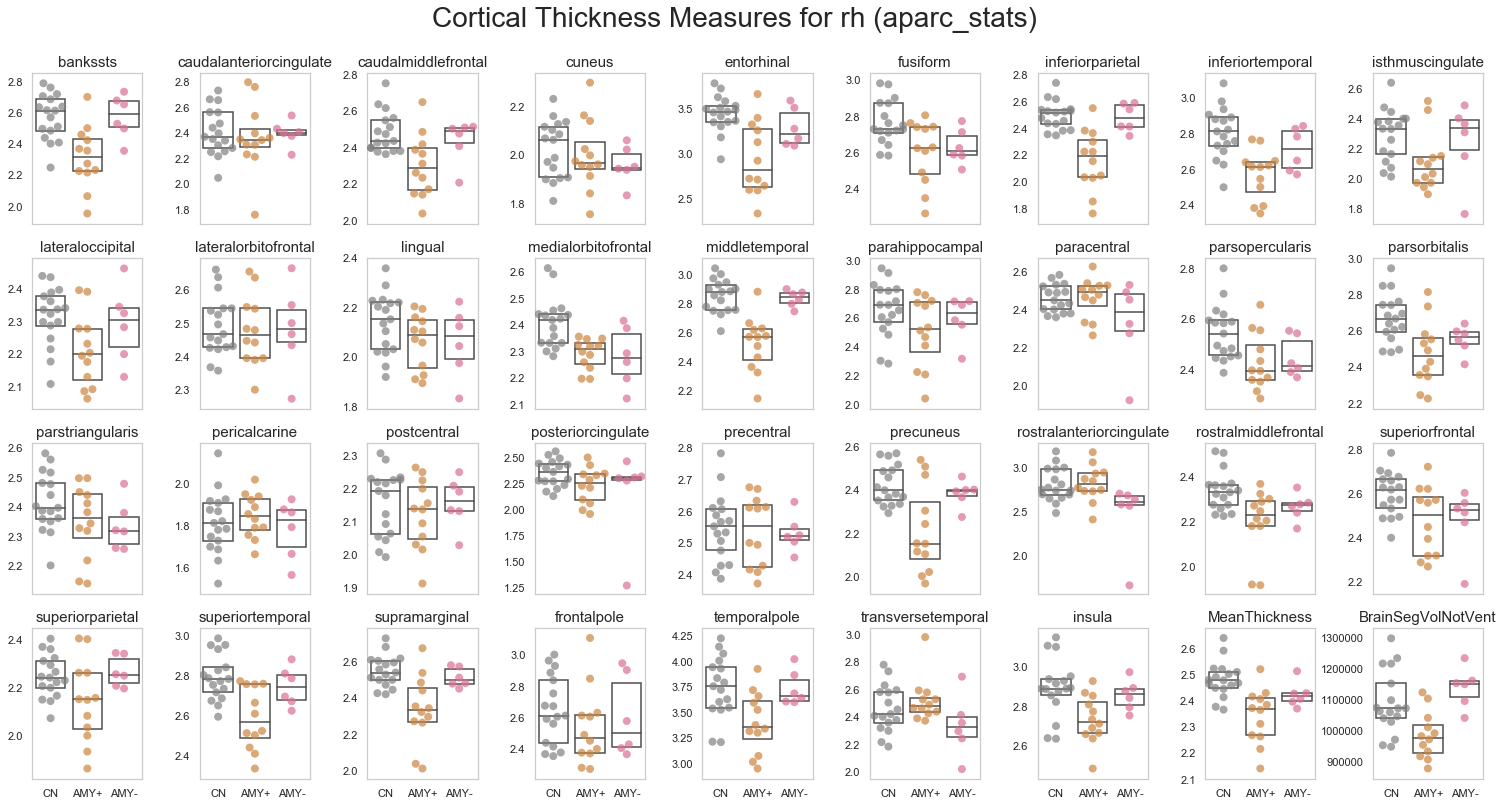

In [524]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
import matplotlib.transforms as transforms
flatui = ["grey", "peru", "palevioletred"]

hemi = ['aseg', 'lh', 'rh']

for tab in hemi:
    print(tab)
    # hemisphere
    
    if tab == 'aseg':
        selectiontitle = 'Subcortical Thickness Measures (aseq_stats)'
        statspathway = '/autofs/cluster/animal/scan_data/leads/recon/leads_aseg_stats.txt'
        rows= 6
        cols= 11
        spacing = .4
    else:
        statspathway = '/autofs/cluster/animal/scan_data/leads/recon/'+tab+'_leads_aparc_stats.txt'
        rows= 4
        cols= 9
        spacing = .22
        selectiontitle = 'Cortical Thickness Measures for '+tab+' (aparc_stats)'
    
    # import dataset
    df = pd.read_csv(statspathway, sep='\t',index_col=0)
    df2 = pd.read_csv('/autofs/cluster/animal/scan_data/leads/recon/demographics', sep='\t', index_col=0, names=colnames)

    # concatenate dataframes
    df_final = df.join(df2)
    
    if tab == 'aseg':
        df_final.to_csv('/autofs/cluster/animal/scan_data/leads/recon/LEADS_aseg_stats')
    elif (tab == 'lh'):
        df_final.to_csv('/autofs/cluster/animal/scan_data/leads/recon/LEADS_aparc_lh_stats')
    elif (tab == 'rh'):
        df_final.to_csv('/autofs/cluster/animal/scan_data/leads/recon/LEADS_aparc_rh_stats')
                          
    rois = list(df_final)[:-1]
    print(len(rois))
    
    if tab == 'aseg':
        trunc_aseg = makenames(rois)
    
    # make a list from last row indices
    lastrow = parserow(rows, cols, rois)
    
    fig = plt.figure(figsize=(26, 13))
    fig.subplots_adjust(hspace=spacing, wspace=.52)
    ttl = fig.suptitle(selectiontitle, fontsize=28)
    ttl.set_position([.5, .95])
    counter = 1
    for i in rois:
        if tab == 'aseg':
            shortname = trunc_aseg[counter-1]
        else:
            try:
                shortname = re.search(tab+'_'+'(.*?)'+'_thickness', i).group(1)
            except AttributeError:
                shortname = i
        try: 
            sns.set(style="whitegrid")
            ax = plt.subplot(rows, cols, counter)
            ax = sns.boxplot(x= 'Group', y=i, data=df_final, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
            ax2 = sns.swarmplot(x= 'Group', y=i, hue='Group', data=df_final, palette=flatui, alpha=0.7, s=8)
            ax2.set_ylabel('')
            ax2.set_xlabel('')
            ax2.axes.set_title(shortname, fontsize=15)
            ax2.legend_.remove()
            ax2.grid(False)
            if i not in lastrow:
                ax2.set_xticklabels([])
    #           if (i == rois[35]) or (i == rois[36]):
    #               ax.ticklabel_format(style='plain', axis='y')
            counter = counter + 1
        except ValueError:
            print('there is no graph '+i+' to print for this block '+str(counter))
    plt.savefig('/autofs/cluster/animal/scan_data/leads/recon/figures/'+tab+'boxswarmplot.png')
    #plt.savefig('/autofs/cluster/animal/scan_data/leads/recon/figures/'+tab+'swarmplot.png')

37


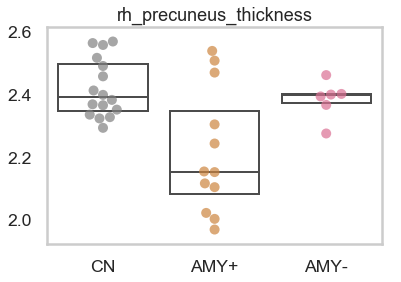

In [546]:
#selectiontitle = 'Subcortical Thickness Measures (aseg_stats)'
#statspathway = '/autofs/cluster/animal/scan_data/leads/recon/leads_aseg_stats.txt'
selectiontitle = 'Cortical Thickness Measures for '+'rh'+' (aparc_stats)'
statspathway = '/autofs/cluster/animal/scan_data/leads/recon/rh_leads_aparc_stats.txt'

# import dataset
df = pd.read_csv(statspathway, sep='\t',index_col=0)
df2 = pd.read_csv('/autofs/cluster/animal/scan_data/leads/recon/demographics', sep='\t', index_col=0, names=colnames)

# concatenate dataframes
df_final = df.join(df2)
newdf = df_final.drop(index='LDS0730001_20180619') # remove this invalid subject
rois = list(newdf)[:-1]
print(len(rois))
flatui = ["grey", "peru", "palevioletred"]


NAME = 'rh_precuneus_thickness'
#rh_entorhinal_thickness #rh_MeanThickness_thickness #rh_precuneus_thickness
#'EstimatedTotalIntraCranialVol' #'Left-Hippocampus' #Right-Hippocampus
# ttl = plt.suptitle(selectiontitle, fontsize=28)
# plot one figure
ax = plt
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=.8, rc={"lines.linewidth": 2})
ax = sns.boxplot(x= 'Group', y=NAME, data=newdf, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False, whiskerprops={'linewidth':0})
ax2 = sns.swarmplot(x= 'Group', y=NAME, hue='Group', data=newdf, palette=flatui, alpha=0.7, s=10)
ax2.set_ylabel('')
ax2.set_xlabel('')
#ax2.ticklabel_format(style='sci', axis='y')

ax2.axes.set_title(NAME, fontsize=18)
ax2.legend_.remove()
ax2.grid(False)
plt.savefig('/autofs/cluster/animal/scan_data/leads/recon/figures/'+NAME+'boxswarmplot.png', bbox_inches="tight")

In [535]:
df_final

newdf = df_final.drop(index='LDS0730001_20180619')

#newdf

,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus-Proper,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,...,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,MaskVol,BrainSegVol-to-eTIV,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,EstimatedTotalIntraCranialVol,Group
Measure:volume,,,,,,,,,,,,,,,,,,,,,
LDS0370012_20180824,8738.6,206.6,15594.5,59224.0,6656.3,3580.5,4283.0,1939.1,736.7,1475.6,...,8.824472e+05,880533.0,1407259.0,0.739875,0.990285,38.0,23.0,61.0,1.421064e+06,CN
LDS0730001_20180619,4442.2,363.4,16028.9,52966.9,6535.7,3672.8,3671.2,1709.0,728.3,1155.7,...,9.259635e+05,922555.0,1433174.0,0.762730,1.019584,26.0,33.0,59.0,1.405645e+06,CN
LDS0110021_20181016,27904.0,933.0,13616.1,43600.3,6467.6,2779.2,4045.1,1796.3,2165.3,2024.2,...,7.630661e+05,761323.0,1390164.0,0.648955,0.947056,30.0,23.0,53.0,1.467879e+06,AMY+
LDS0370013_20180822,6697.4,254.9,17683.1,58624.6,8278.5,4156.3,4623.4,2043.5,720.4,1637.9,...,1.067776e+06,1064596.0,1618193.0,0.794925,1.041876,29.0,16.0,45.0,1.553154e+06,CN
LDS0730024_20181107,16562.7,1406.0,15405.9,61381.2,7501.0,3279.1,4409.1,1973.7,2709.6,2191.0,...,1.011772e+06,1009287.0,1682270.0,0.744041,1.043476,60.0,23.0,83.0,1.612179e+06,AMY-
LDS0110022_20181129,12586.0,380.3,14083.7,49305.9,6742.2,3019.0,4061.7,1844.2,1208.0,1006.2,...,8.300227e+05,826398.0,1417734.0,0.704438,1.010340,100.0,105.0,205.0,1.403224e+06,AMY+
LDS0370014_20180913,10101.0,346.2,14563.6,52588.3,7513.9,3080.8,4543.5,2036.3,856.2,1996.3,...,9.125120e+05,910188.0,1459400.0,0.736964,1.006162,20.0,18.0,38.0,1.450462e+06,AMY-
LDS3600030_20181219,22465.2,841.3,17297.0,58511.1,7201.1,3072.2,3905.7,1979.7,2498.3,2115.7,...,8.431524e+05,840739.0,1579260.0,0.658278,0.991433,44.0,41.0,85.0,1.592906e+06,AMY+
LDS0220026_20181109,20567.1,333.7,13420.9,50555.5,7022.1,3529.4,5162.0,1911.9,1299.3,3323.5,...,9.487462e+05,946080.0,1619776.0,0.733354,1.063986,30.0,28.0,58.0,1.522366e+06,CN


In [414]:
selectiontitle = 'Subcortical Thickness Measures (aseq_stats)'
statspathway = '/autofs/cluster/animal/scan_data/leads/recon/leads_aseg_stats.txt'
#selectiontitle = 'Cortical Thickness Measures for '+'rh'+' (aparc_stats)'
#statspathway = '/autofs/cluster/animal/scan_data/leads/recon/rh_leads_aparc_stats.txt'

# import dataset
df = pd.read_csv(statspathway, sep='\t') #,index_col=0)
df2 = df.T
#df = pd.read_csv('/autofs/cluster/animal/scan_data/leads/recon/demographics', sep='\t', index_col=0, names=colnames)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
Measure:volume,LDS0370012_20180824,LDS0730001_20180619,LDS0110021_20181016,LDS0370013_20180822,LDS0730024_20181107,LDS0110022_20181129,LDS0370014_20180913,LDS3600030_20181219,LDS0220026_20181109,LDS0370015_20181113,...,LDS0370007_20180801,LDS0370029_20181210,LDS0370008_20180815,LDS0370034_20190107,LDS0370009_20180816,LDS0370037_20181218,LDS0370010_20180815,LDS0370038_20181217,LDS0370011_20180822,LDS0370042_20190108
Left-Lateral-Ventricle,8738.6,4442.2,27904,6697.4,16562.7,12586,10101,22465.2,20567.1,5266.2,...,64113.5,18565.4,11731.6,10560.5,15484.9,13320.5,10093.6,36707.7,6157.3,17062.5
Left-Inf-Lat-Vent,206.6,363.4,933,254.9,1406,380.3,346.2,841.3,333.7,57.5,...,4083.2,188.4,863.6,410,3155.9,255,659.1,795.8,154.8,950.7
Left-Cerebellum-White-Matter,15594.5,16028.9,13616.1,17683.1,15405.9,14083.7,14563.6,17297,13420.9,13857.5,...,16014.9,16478.9,15023,14598.9,15768.6,15805.1,16634.9,14210.5,17574.3,18492.8
Left-Cerebellum-Cortex,59224,52966.9,43600.3,58624.6,61381.2,49305.9,52588.3,58511.1,50555.5,47642,...,53102.2,52496.7,57012.3,54557.2,52731.1,58924.8,45259.3,52860.8,54604.4,51655.1
Left-Thalamus-Proper,6656.3,6535.7,6467.6,8278.5,7501,6742.2,7513.9,7201.1,7022.1,6732.7,...,6308.2,7528.6,7101.6,7393.8,3877.1,6915.8,6661.4,6321.9,7366.4,7119.6
Left-Caudate,3580.5,3672.8,2779.2,4156.3,3279.1,3019,3080.8,3072.2,3529.4,2776.9,...,3460.2,3502.9,3706.2,3163,1026.7,3185.5,3105.3,3199.6,3997.6,3887.6
Left-Putamen,4283,3671.2,4045.1,4623.4,4409.1,4061.7,4543.5,3905.7,5162,4990.3,...,3863,4977.7,4625.8,5325.9,2860.1,4250.4,3938.9,3682.4,4555.2,5105.3
Left-Pallidum,1939.1,1709,1796.3,2043.5,1973.7,1844.2,2036.3,1979.7,1911.9,1683.7,...,1844,1981.9,2129.6,2356,893.6,1965.5,1689.3,1849.9,1947.1,2082.5
3rd-Ventricle,736.7,728.3,2165.3,720.4,2709.6,1208,856.2,2498.3,1299.3,672,...,4819.5,1081,1548.8,1495.5,820.5,1458.1,671.4,2310.5,757,1398.9
